**Integrantes:**
- Andrés Eduardo Cristancho Rincón
- Danna Pauleth Lopez Acosta

In [ ]:
# DATOS

API_KEY = "RGAPI-719711a7-3e15-4602-916a-9ab2547d2fe2"

alias = "Aincradstyle16"
tag = "LAN"

# Cuenta: https://developer.riotgames.com/apis#account-v1
# Invocador: https://developer.riotgames.com/apis#summoner-v4
# Partidas: https://developer.riotgames.com/apis#match-v5

# Champion mastery: https://developer.riotgames.com/apis#champion-mastery-v4/GET_getAllChampionMasteriesByPUUID

In [ ]:
# @title ## Info

import pandas as pd
import requests

# Cuenta
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{alias}/{tag}?api_key={API_KEY}"
peticion = requests.get (url)
respuesta = peticion.json ()

puuid = respuesta ["puuid"]

print (f"Alias: {alias}")
print (f"Tag: #{tag}")
print (f"Puuid: {puuid}")
print ()

# Invocador
url = f"https://la1.api.riotgames.com/lol/summoner/v4/summoners/by-puuid/{puuid}?api_key={API_KEY}"
peticion = requests.get (url)
respuesta = peticion.json ()

cuenta_id = respuesta ["accountId"]
invocador_id = respuesta ["id"]
invocador_nivel = respuesta ["summonerLevel"]

print (f"Cuenta id: {cuenta_id}")
print (f"Invocador id: {invocador_id}")
print (f"Invocador nivel: {invocador_nivel}")


Alias: Aincradstyle16
Tag: #LAN
Puuid: YtU-XF5zSeNh9BkcmVqM0UVzdOXyF_hZkF07XXbumSbYWkGWaZY0ixfrhv18B-TX8O4EF7NbKPbU7Q

Cuenta id: aHTLMexdHuaAUvS5p67dyGyQGSUT8zweNzDXNzfQakQx5okucYJPKrA8
Invocador id: kjg7izA_JKl6A7xChNCQWefqK1NtoQHvhqgFlBSUbLks_yk
Invocador nivel: 365


In [ ]:
# @title ## Partidas

def obtener_partida (id):
    url = f"https://americas.api.riotgames.com/lol/match/v5/matches/{id}?api_key={API_KEY}"
    peticion = requests.get (url)
    respuesta = peticion.json ()

    return respuesta

def formatear_partida (partida):
    metadata = partida ["metadata"]
    info = partida ["info"]

    indice = metadata ["participants"].index (puuid)
    jugador = info ["participants"][indice]
    assert jugador ["puuid"] == puuid, "No son iguales"

    return {
        # Partida
        "gameId": info ["gameId"],
        "endOfGameResult": info ["endOfGameResult"],
        "gameDuration": info ["gameDuration"] / 60,
        "mapId": info ["mapId"],

        # Equipo
        "teamEarlySurrendered": jugador ["teamEarlySurrendered"],
        "win": jugador ["win"],

        # Jugador
        "championName": jugador ["championName"],
        "role": jugador ["role"],
        "assists": jugador ["assists"],
        "champExperience": jugador ["champExperience"],
        "champLevel": jugador ["champLevel"],
        "deaths": jugador ["deaths"],
        "kills": jugador ["kills"],
        "doubleKills": jugador ["doubleKills"],
        "tripleKills": jugador ["tripleKills"],
        "killingSprees": jugador ["killingSprees"],
        "pentaKills": jugador ["pentaKills"],
        "longestTimeSpentLiving": jugador ["longestTimeSpentLiving"],
        "totalDamageTaken": jugador ["totalDamageTaken"],
        "totalHeal": jugador ["totalHeal"],

        "firstBloodAssist": jugador ["firstBloodAssist"],
        "firstBloodKill": jugador ["firstBloodKill"],
        "firstTowerAssist": jugador ["firstTowerAssist"],
        "firstTowerKill": jugador ["firstTowerKill"],

        # Adicionales
        "goldEarned": jugador ["goldEarned"],
        "goldSpent": jugador ["goldSpent"],
        "itemsPurchased": jugador ["itemsPurchased"]
    }

url = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=100&api_key={API_KEY}"
peticion = requests.get (url)
respuesta = peticion.json ()

partidas = []
try:
    for partida_id in respuesta:
        partida = obtener_partida (partida_id)
        partida = formatear_partida (partida)
        partidas.append (partida)
except:
    pass

partidas = pd.DataFrame (partidas)
partidas.to_csv ("partidas.csv")

In [ ]:
# @title # Análisis

<ipython-input-71-0235eda49a67>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.index, y=win_rate.values, palette="viridis")


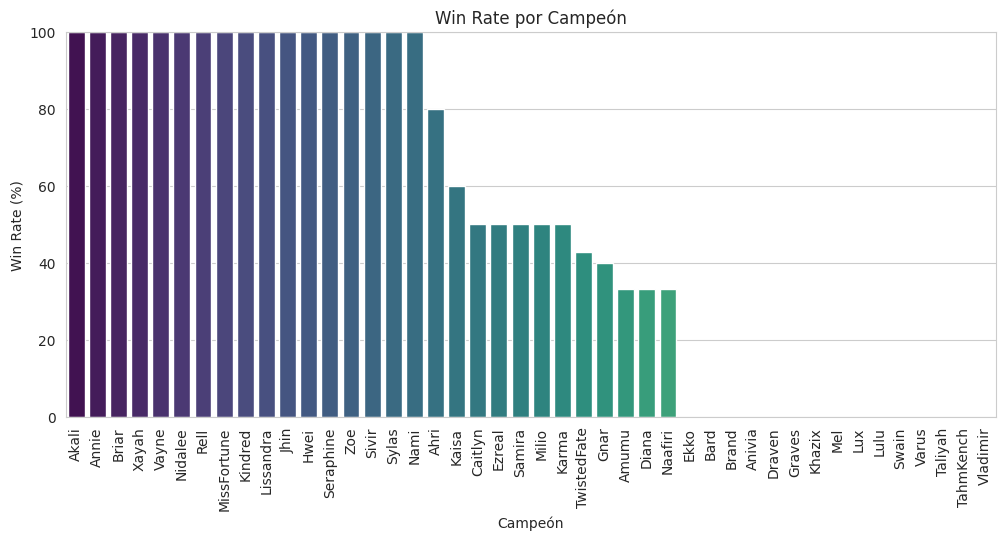

In [71]:
# @title ## Análisis General

# 🏆 Calcular el Win Rate en porcentaje
win_rate = db.groupby("championName")["win"].mean() * 100  # Convertir a porcentaje
win_rate = win_rate.sort_values(ascending=False)

# 🔹 Gráfico de barras
plt.figure(figsize=(12, 5))
sns.barplot(x=win_rate.index, y=win_rate.values, palette="viridis")

# 🏷️ Etiquetas y título
plt.xticks(rotation=90)
plt.title("Win Rate por Campeón")
plt.xlabel("Campeón")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)  # Asegurar que el eje Y vaya de 0 a 100%

# 🔍 Mostrar gráfico
plt.show()


# Los campeones con mayor número de victorias son:

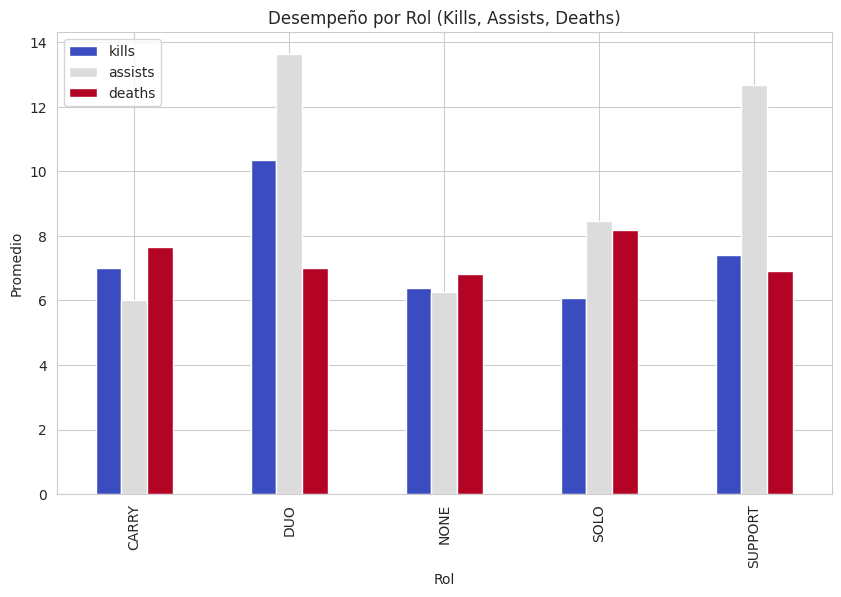

In [73]:
# 2️⃣ Desempeño por Rol
role_stats = db.groupby("role")[["kills", "assists", "deaths"]].mean()
role_stats.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Desempeño por Rol (Kills, Assists, Deaths)")
plt.xlabel("Rol")
plt.ylabel("Promedio")
plt.show()

# Desempeño por Rol:

<ipython-input-85-16a966147543>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_sorted["goldEarned"], y=df_sorted["totalDamageTaken"], palette="coolwarm")
<ipython-input-85-16a966147543>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_oro(val) for val in df_sorted["goldEarned"]], rotation=90, ha="right")


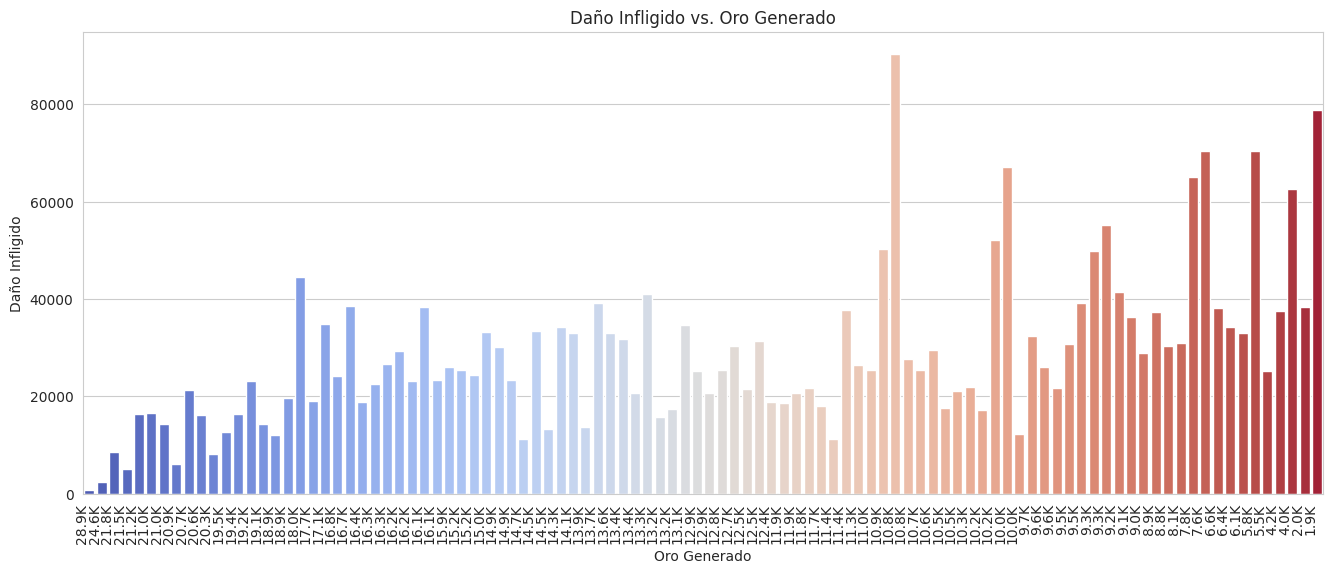

In [85]:
# 🏆 Ordenar por oro ganado
df_sorted = db.sort_values(by="goldEarned", ascending=False)

# 🔹 Crear el gráfico
plt.figure(figsize=(16, 6))  # Hacerlo más ancho
ax = sns.barplot(x=df_sorted["goldEarned"], y=df_sorted["totalDamageTaken"], palette="coolwarm")

# 🏷️ Etiquetas y mejoras en el eje X
plt.title("Daño Infligido vs. Oro Generado")
plt.xlabel("Oro Generado")
plt.ylabel("Daño Infligido")

# 🔹 Convertir los valores de oro a K (miles) o M (millones)
def format_oro(valor):
    if valor >= 1_000_000:
        return f"{valor/1_000_000:.1f}M"  # Millones
    elif valor >= 1_000:
        return f"{valor/1_000:.1f}K"  # Miles
    else:
        return str(int(valor))  # Número normal

# Aplicar el formato a los valores del eje X
ax.set_xticklabels([format_oro(val) for val in df_sorted["goldEarned"]], rotation=90, ha="right")

# 🔍 Mostrar gráfico
plt.show()


# Daño recibido a partir

<ipython-input-77-60025ec046b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=db["win"], y=db["KDA"], palette="coolwarm")


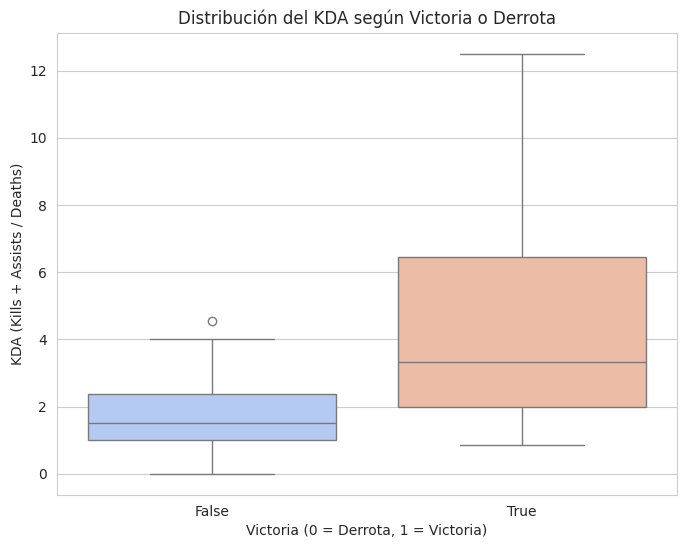

In [77]:
# 4️⃣ Relación KDA y Win Rate (Boxplot para mejor análisis)
db["KDA"] = (db["kills"] + db["assists"]) / db["deaths"].replace(0, 1)  # Evitar división por 0

plt.figure(figsize=(8, 6))
sns.boxplot(x=db["win"], y=db["KDA"], palette="coolwarm")
plt.title("Distribución del KDA según Victoria o Derrota")
plt.xlabel("Victoria (0 = Derrota, 1 = Victoria)")
plt.ylabel("KDA (Kills + Assists / Deaths)")
plt.show()

# Distribución del KDA según Victoria o Derrota

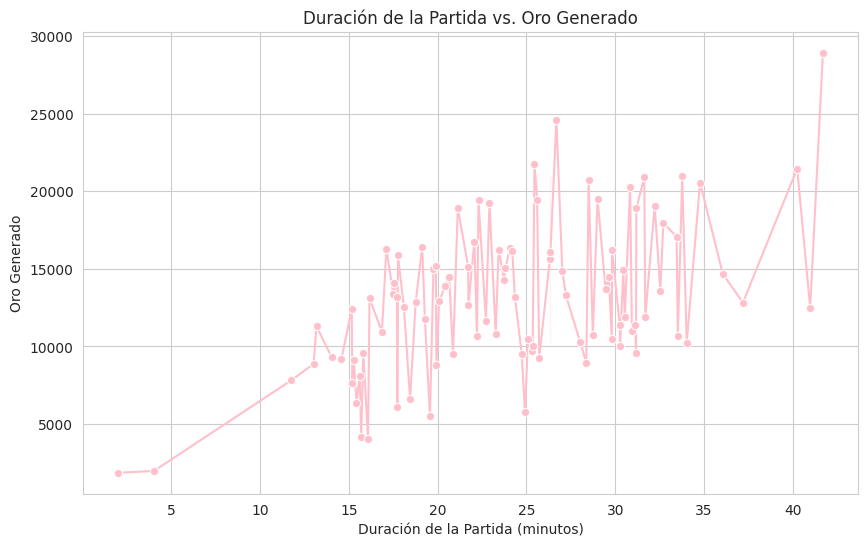

In [79]:
# 5️⃣ Duración de Partida vs. Oro Generado (Gráfico de Líneas)
db_sorted = db.sort_values(by="gameDuration")  # Ordenar por duración de partida

plt.figure(figsize=(10, 6))
sns.lineplot(x=db_sorted["gameDuration"], y=db_sorted["goldEarned"], marker="o", color="pink")

# Etiquetas y título
plt.title("Duración de la Partida vs. Oro Generado")
plt.xlabel("Duración de la Partida (minutos)")
plt.ylabel("Oro Generado")
plt.grid(True)
plt.show()

# Duración de la Partida vs. Oro Generado

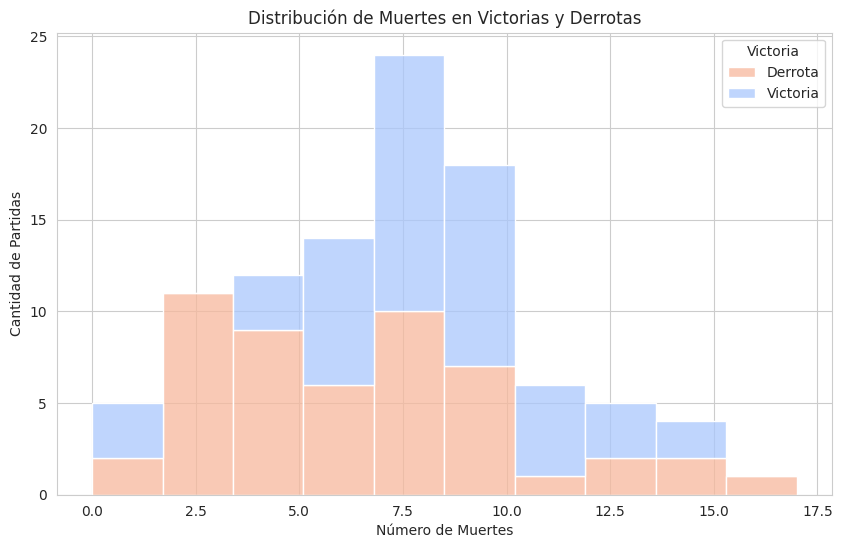

In [80]:
# 6️⃣ Muertes vs. Derrotas (Histograma Apilado)
plt.figure(figsize=(10, 6))

# Crear histogramas apilados para victorias y derrotas
sns.histplot(db, x="deaths", hue="win", multiple="stack", bins=10, palette="coolwarm", kde=False)

# Etiquetas y título
plt.title("Distribución de Muertes en Victorias y Derrotas")
plt.xlabel("Número de Muertes")
plt.ylabel("Cantidad de Partidas")
plt.legend(title="Victoria", labels=["Derrota", "Victoria"])
plt.show()

# Distribución de Muertes en Victorias y Derrotas

<ipython-input-81-6e0a0d59c1a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate_by_role.index, y=win_rate_by_role.values, palette="viridis")


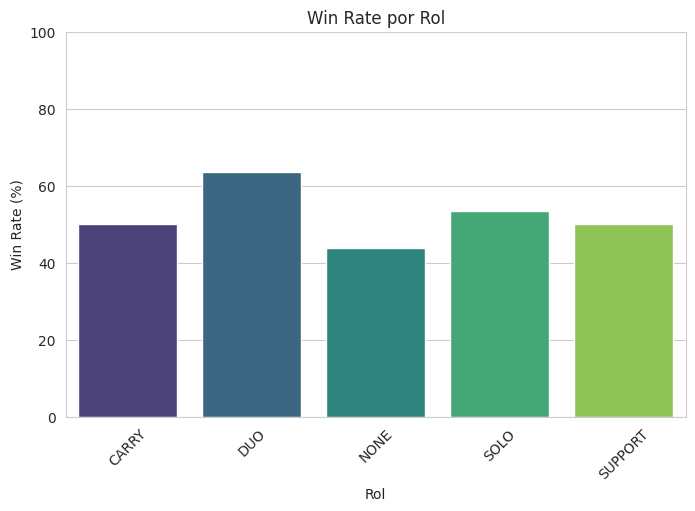

In [81]:
# 📊 Calcular el Win Rate por Rol
win_rate_by_role = db.groupby("role")["win"].mean() * 100  # Convertir a porcentaje

# 🔹 Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=win_rate_by_role.index, y=win_rate_by_role.values, palette="viridis")

# 🏷️ Etiquetas y título
plt.title("Win Rate por Rol")
plt.xlabel("Rol")
plt.ylabel("Win Rate (%)")
plt.ylim(0, 100)  # Limitar de 0 a 100% para claridad
plt.xticks(rotation=45)  # Rotar los nombres si están muy juntos

# 🔍 Mostrar gráfico
plt.show()

# Win Rate por Rol

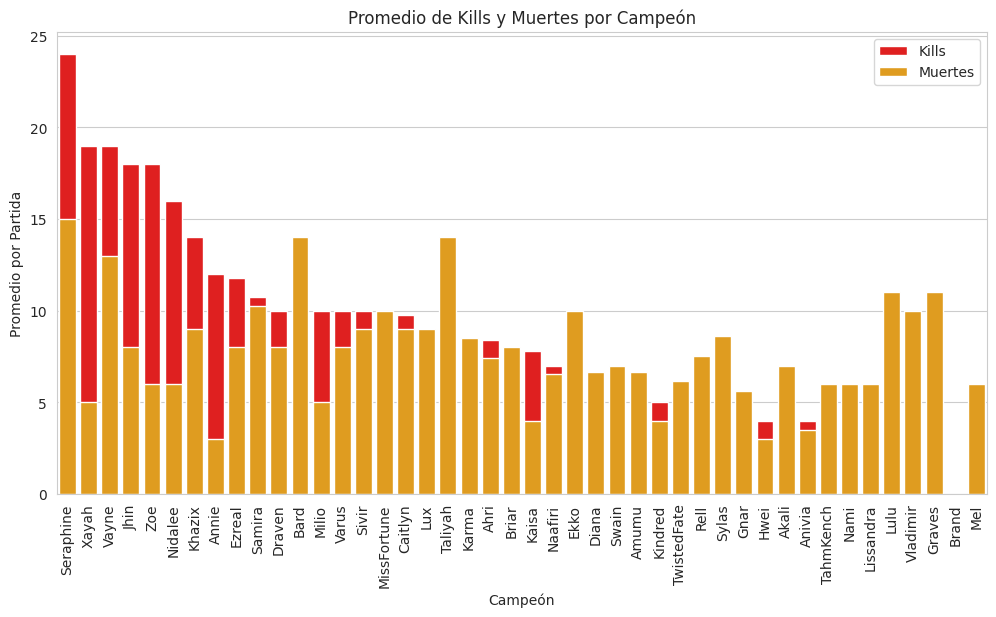

In [82]:
# 📊 Calcular el promedio de muertes y rachas por campeón
deaths_by_champ = db.groupby("championName")[["kills", "deaths"]].mean().sort_values(by="kills", ascending=False)

# 🔹 Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=deaths_by_champ.index, y=deaths_by_champ["kills"], color="red", label="Kills")
ax = sns.barplot(x=deaths_by_champ.index, y=deaths_by_champ["deaths"], color="orange", label="Muertes")

# 🏷️ Etiquetas y título
plt.title("Promedio de Kills y Muertes por Campeón")
plt.xlabel("Campeón")
plt.ylabel("Promedio por Partida")
plt.xticks(rotation=90)  # Para evitar que los nombres se mezclen
plt.legend()

# 🔍 Mostrar gráfico
plt.show()

# Promedio de Kills y Muertes por Campeón

<ipython-input-83-c218c4207d55>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_by_champ.index, y=exp_by_champ.values, palette="magma")


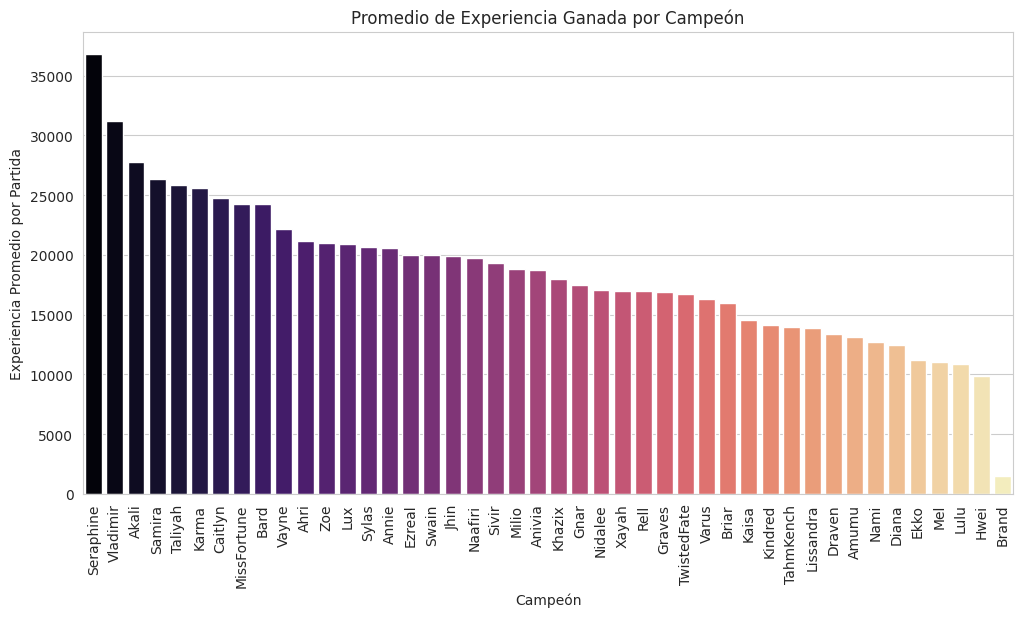

In [83]:
# 📊 Calcular el promedio de experiencia por campeón
exp_by_champ = db.groupby("championName")["champExperience"].mean().sort_values(ascending=False)

# 🔹 Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=exp_by_champ.index, y=exp_by_champ.values, palette="magma")

# 🏷️ Etiquetas y título
plt.title("Promedio de Experiencia Ganada por Campeón")
plt.xlabel("Campeón")
plt.ylabel("Experiencia Promedio por Partida")
plt.xticks(rotation=90)  # Para evitar que los nombres se mezclen

# 🔍 Mostrar gráfico
plt.show()

# Promedio de Experiencia Ganada por Campeón

              #  Número de veces jugado  %Victorias
0          Ahri                       5       80.00
1         Amumu                       3       33.33
2       Caitlyn                       4       50.00
3         Diana                       6       33.33
4        Ezreal                       4       50.00
5          Gnar                      10       40.00
6         Kaisa                       5       60.00
7       Naafiri                       9       33.33
8        Samira                       4       50.00
9         Sylas                       5      100.00
10  TwistedFate                       7       42.86


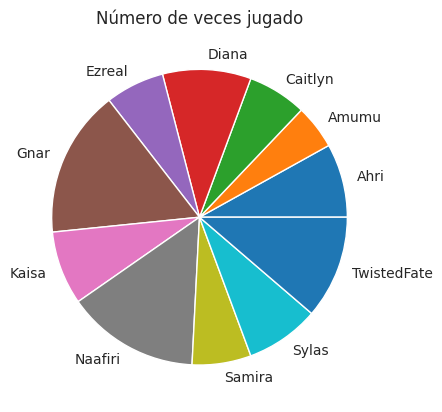

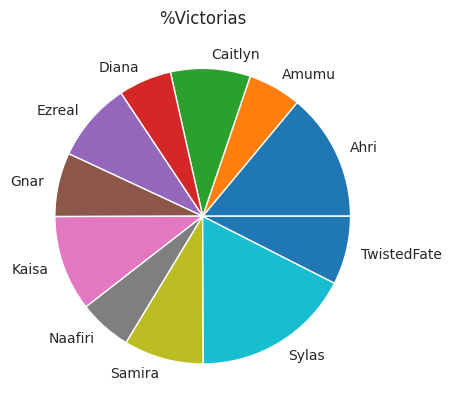

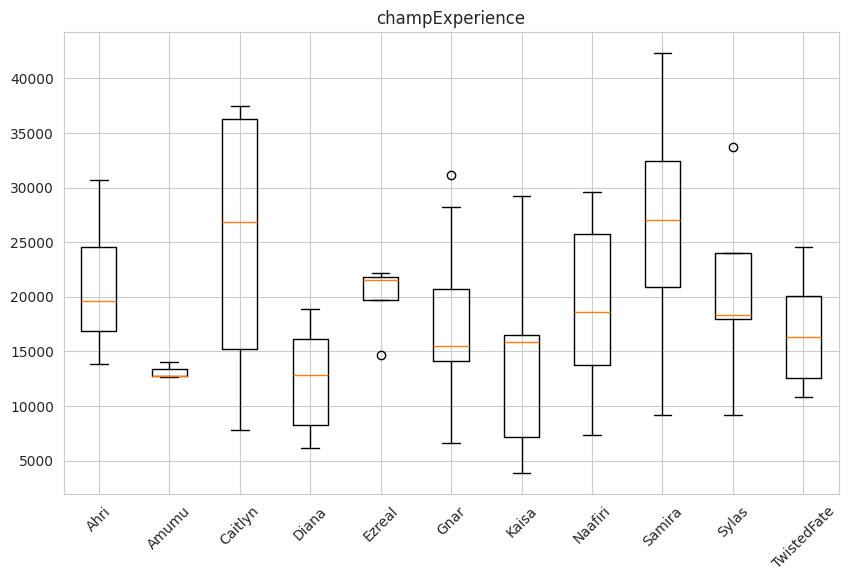

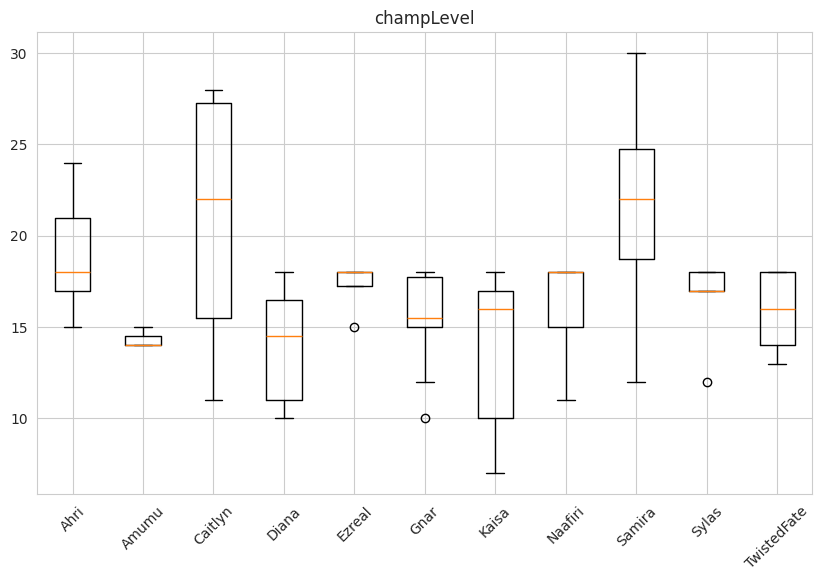

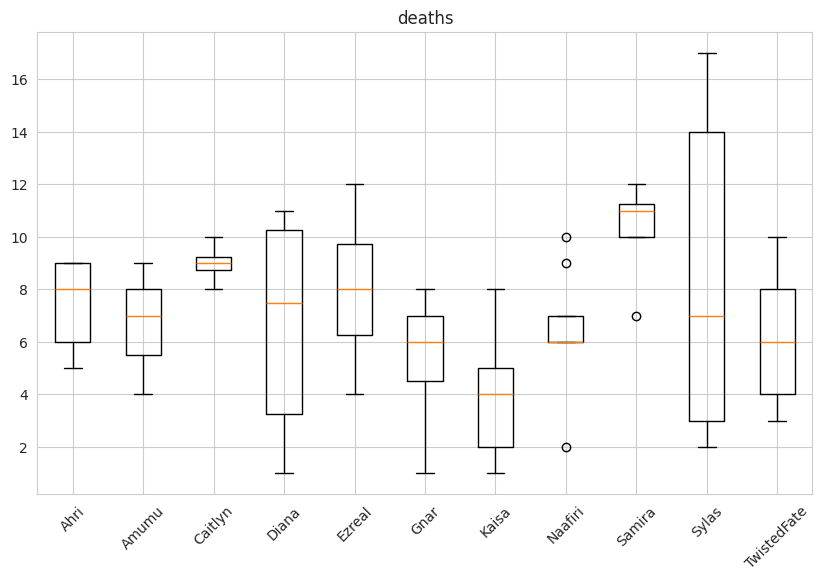

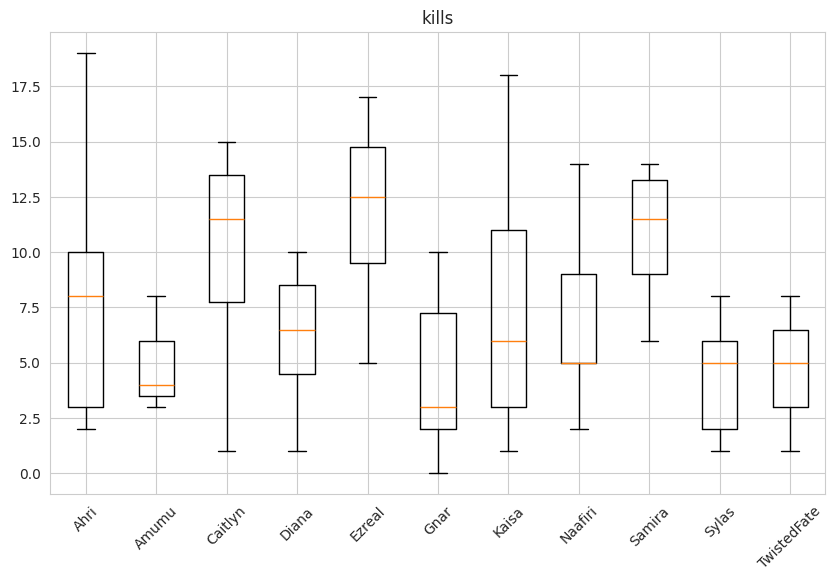

In [69]:
# @title ## Análisis Específico

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

# Leer
db = pd.read_csv ("partidas.csv")

# Funciones

def contar (db, label, filtrar = True):
    clases = np.unique (db [label])

    contar = {
        "#": [],
        "Número de veces jugado": [],
        "%Victorias": []
    }

    for clase in clases:
        seleccion = db.loc [db[label] == clase]

        if len (seleccion) < 3:
            continue

        contar["#"].append (clase)
        contar["Número de veces jugado"].append (len (seleccion))
        contar["%Victorias"].append(((seleccion["win"]).mean () * 100).round (2))

    contar = pd.DataFrame (contar)
    print (contar.sort_values(by = ["#"], ascending = True))

    plt.figure (1)
    plt.pie (contar["Número de veces jugado"], labels = contar ["#"])
    plt.title ("Número de veces jugado")
    plt.show ()

    plt.figure (2)
    plt.pie (contar["%Victorias"], labels = contar ["#"])
    plt.title ("%Victorias")
    plt.show ()

def agrupar_boxplot (db, label, columna, filtrar = True):
    clases_nombres = np.unique (db [label])

    clases = []

    for nombre in clases_nombres:
        seleccion = db.loc [db[label] == nombre]

        if len (seleccion) < 3:
            continue

        clases.append ({
            "id": nombre,
            "championName": seleccion ["championName"],
            "gameDuration": seleccion ["gameDuration"],
            "win": (seleccion ["win"]).astype(int),
            "role": seleccion ["role"],
            "assists": seleccion ["assists"],
            "champExperience": seleccion ["champExperience"],
            "champLevel": seleccion ["champLevel"],
            "deaths": seleccion ["deaths"],
            "kills": seleccion ["kills"],
            "contar": seleccion.count ()
        })

    ids = []
    datos = []

    for clase in clases:
        id = clase["id"]
        valores = clase [columna]

        ids.append (id)
        datos.append (valores)

    plt.figure (1, figsize = [10, 6])
    plt.title (columna)
    plt.boxplot (datos)
    plt.xticks(np.arange (1, len(datos)+1, 1), ids, rotation = 45)
    plt.show ()

contar (db, "championName")
agrupar_boxplot (db, "championName", "champExperience")
agrupar_boxplot (db, "championName", "champLevel")
agrupar_boxplot (db, "championName", "deaths")
agrupar_boxplot (db, "championName", "kills")